# E-commerce site clients segmentation

# Content
- [Context of the problem](#Context-of-the-problem)
- [Pre-exploratory stage: General analysis and discovery of the files](#Pre-exploratory-stage:-General-analysis-and-discovery-of-the-files)
- [Exploratory analysis and data cleaning](#Exploratory-analysis-and-data-cleaning)
- [Prediction analysis](#Prediction-analysis)

## Context of the problem

* Olist wants us to provide to their e-commerce teams information about customer segmentation that they can use for their daily communication campaigns.

* Our goal is to understand the different types of users through their behavior and personal data. We need to provide the marketing team an actionable description of the customer segmentation and the underlying logic for optimal use, as well as a maintenance contract proposal based on an analysis of segment stability over time.

* Olist provides an anonymized database containing information on order history, products purchased, satisfaction comments, and customer location since January 2017.

* The mission is to help Olist teams understand the different types of users. We will therefore use unsupervised methods to group customers with similar profiles. These categories can be used by the Marketing team to better communicate.

*  **Olist internal dashboards suggest that only 3% of customers in the data have made several orders. The data available will be sufficient to perform a first clustering.**

* The proposed segmentation must be easy to use by Olist Marketing team. It must be able to differentiate between good and less good customers in terms of orders and satisfaction. Olist expect segmentation on all customers as well.

* **Once the segmentation model has been chosen, Olist would like us to recommend how often the segmentation should be updated to remain relevant, in order to be able to quote a maintenance contract.**


This dataset was provided by Olist, the largest department store in Brazilian marketplaces. Olist connects small businesses from all over Brazil to channels without hassle and with a single contract. Those merchants are able to sell their products through the Olist Store and ship them directly to the customers using Olist logistics partners.

See more on our website: https://olist.com/pt-br/

After a customer purchases the product from Olist Store a seller gets notified to fulfill that order. Once the customer receives the product, or the estimated delivery date is due, the customer gets a satisfaction survey by email where he can give a note for the purchase experience and write down some comments.

Attention:
* An order might have multiple items.
* Each item might be fulfilled by a distinct seller.
* All text identifying stores and partners where replaced by the names of Game of Thrones great houses.

https://www.kaggle.com/olistbr/brazilian-ecommerce

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Use seaborn style defaults and set the default figure size
import seaborn as sns
sns.set(rc={'figure.figsize':(11, 6)})

The database is divided in multiple datasets for better understanding and organization.

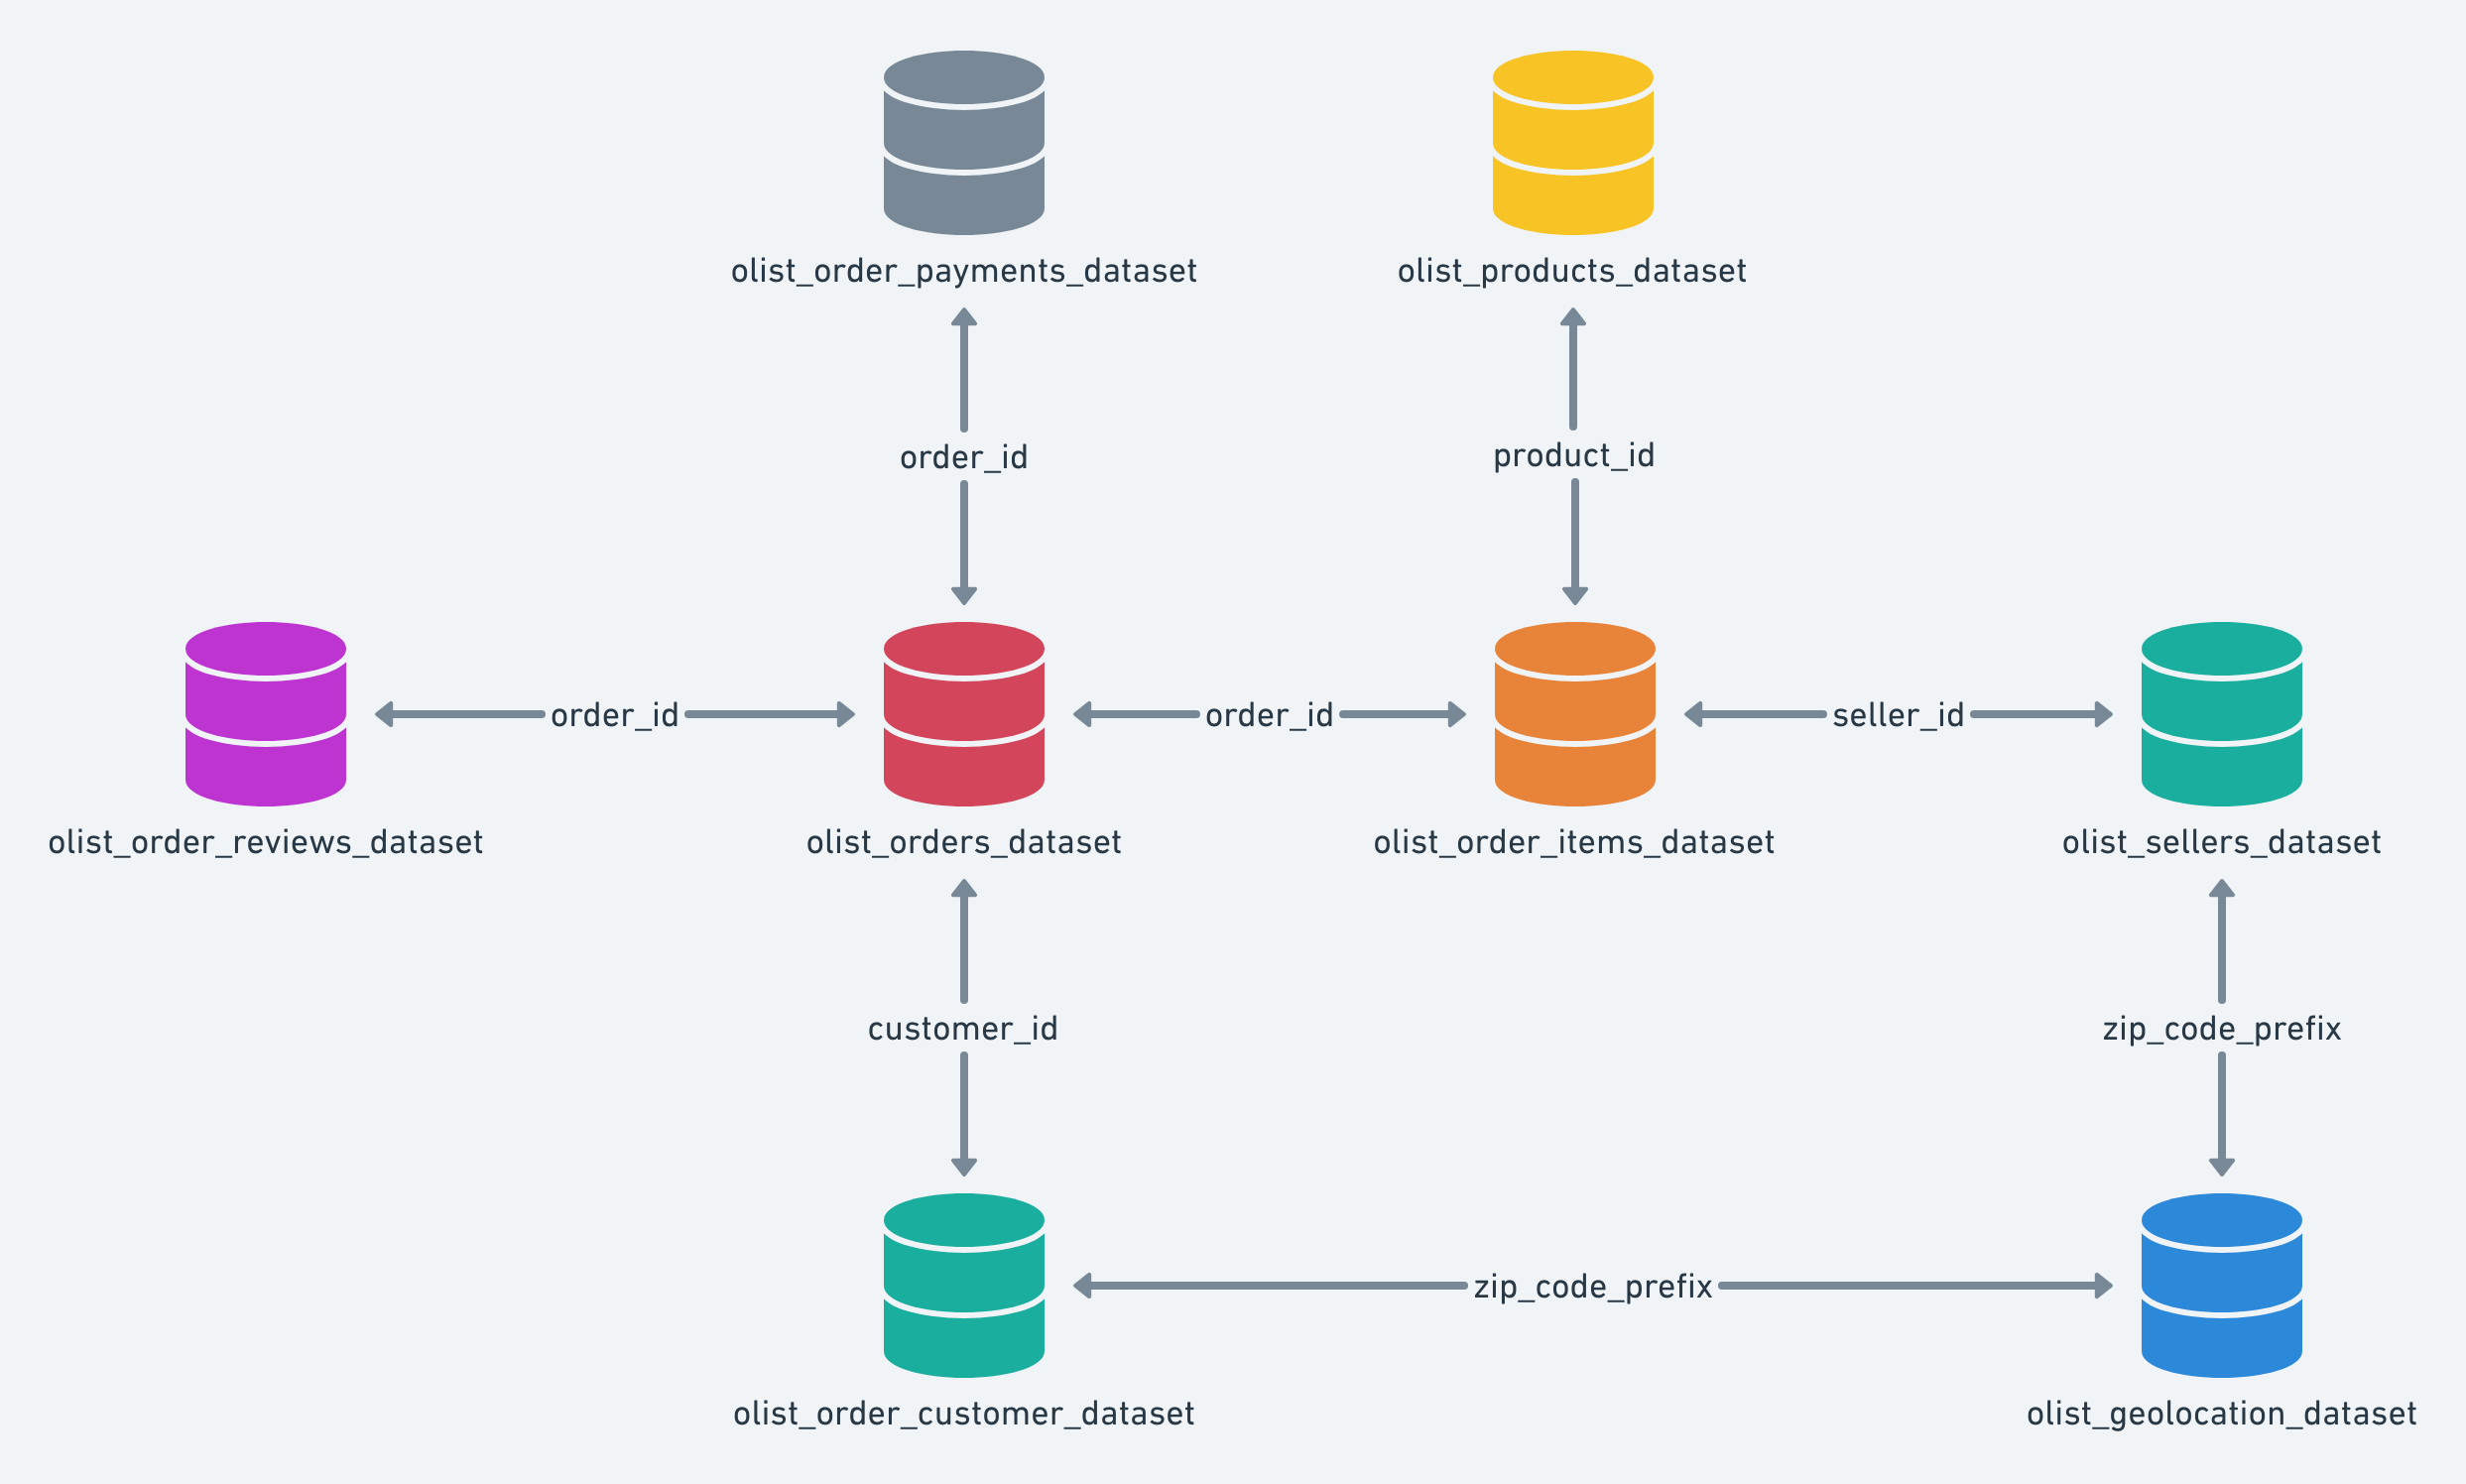

In [2]:
%matplotlib inline
from IPython.display import Image
Image('HRhd2Y0.png')

## Pre-exploratory stage: General analysis and discovery of the files

### Olist customer data file

In [3]:
olist_customers_df = pd.read_csv('olist_customers_dataset.csv')
olist_customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


The customers dataset contains:
* **customer_id:** key to the orders dataset. Each order has a unique customer_id.
* **customer_unique_id**: unique identifier of a customer.

It also contains information about the customer: 
* **zip code, city and state.**

### Olist geolocation data file

In [4]:
olist_geolocation_df = pd.read_csv('olist_geolocation_dataset.csv')
olist_geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


The geolocation dataset contains information about geographical coordinates of a determined city. This data dile does not contain information about the customer.

### Olist order items data file

In [5]:
olist_order_items_df = pd.read_csv('olist_order_items_dataset.csv')
olist_order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


The order items dataset contains information about orders, such as:
* The **order unique identifier**, 
* The **product unique identifier**, 
* The **seller unique identifier**, 
* The **shipping date**, 
* **price per item** and, 
* **freight value per item**. 

If an order has more than one item the freight value is splitted between items. 

The order_id = 00143d0f86d6fbd9f9b38ab440ac16f5 has 3 items (same or different products). Each item has the freight calculated accordingly to its measures and weight. To get the total freight value for each order you just have to sum.

* The total order_item value is: 21.33 * 3 = 63.99

* The total freight value is: 15.10 * 3 = 45.30

* The total order value (freight + product) is: 45.30 + 63.99 = 109.29

See reference and data documentation: https://www.kaggle.com/olistbr/brazilian-ecommerce?select=olist_order_items_dataset.csv

The previously indicated can be useful for performing feature engineering.

The order item id is a sequential number that indicates the number of items included in the same order.

In [6]:
olist_order_items_df[olist_order_items_df['order_id'] == '00143d0f86d6fbd9f9b38ab440ac16f5']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
32,00143d0f86d6fbd9f9b38ab440ac16f5,1,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1
33,00143d0f86d6fbd9f9b38ab440ac16f5,2,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1
34,00143d0f86d6fbd9f9b38ab440ac16f5,3,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1


In [7]:
# olist_order_items_df[olist_order_items_df['order_id'] == '8272b63d03f5f79c56e9e4120aec44ef']

### Olist order payments data file

In [8]:
olist_order_payments_df = pd.read_csv('olist_order_payments_dataset.csv')
olist_order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


The order payments dataset includes data about the orders payment options. It contains: 
* The **order unique identifier**,  
* The **payment method or type** chosen by the customer, 
* **payment sequential** indicates when a customer may pay an order with more than one payment method. If he does so, a sequence will be created to accommodate all payments, 
* **payment or transaction value** and, 
* **payment installments** chosen by the customer.

### Olist order reviews data file

In [9]:
olist_order_reviews_df = pd.read_csv('olist_order_reviews_dataset.csv')
olist_order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


The order reviews dataset contains information about: 
* The **order unique identifier**, 
* **review unique identifier**, 
* **review score** which is a score ranging from 1 to 5 given by the customer on a satisfaction survey, 
* **review title and review comment** which is left by the customer in Portuguese, 
* **creation date** that shows the date in which the satisfaction survey was sent to the customer and, 
* the **review answer timestamp** that shows satisfaction survey answer timestamp.

### Olist orders data file

In [10]:
olist_orders_df = pd.read_csv('olist_orders_dataset.csv')
olist_orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


The orders dataset contains: 
* The **order unique identifier**, 
* the **customer unique identifier** that is the key to the customer dataset (each order has a unique customer identifier), 
* the **order status** (delivered, shipped, etc), 
* the **order purchase timestamp** that shows the purchase timestamp, 
* the **order approval timestamp** that shows the payment approval timestamp,
* the **order delivered carrier date** that shows the order posting timestamp. When it was handled to the logistic partner,
* the **order delivered customer date** that shows the actual order delivery date to the customer and,
* the **estimated delivery date of the order** that shows the estimated delivery date that was informed to customer at the purchase moment.

### Olist products data file

In [11]:
olist_products_df = pd.read_csv('olist_products_dataset.csv')
olist_products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


The product dataset contains information about the **product unique identifier** and product description.

### Olist sellers data file

In [12]:
olist_sellers_df = pd.read_csv('olist_sellers_dataset.csv')
olist_sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


The sellers dataset contains the sellers information such as: 
* **seller unique id** and 
* **sellers geographical location**.

### Olist product category name translation in english data file

In [13]:
product_category_name_translation_df = pd.read_csv('product_category_name_translation.csv')
product_category_name_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


The products category dataset contains: 
* The **product category name** in portuguese and 
* **product category name translated** in english. 

Part of the files discovery is their number of columns and rows, and the number of missing values.

In [14]:
list_data_files = [
            'olist_customers_dataset',
            'olist_geolocation_dataset',
            'olist_order_items_dataset', 
            'olist_order_payments_dataset',
            'olist_order_reviews_dataset',
            'olist_orders_dataset',
            'olist_products_dataset',
            'olist_sellers_dataset',
            'product_category_name_translation'
            ]

list_data_frames = [
            olist_customers_df,
            olist_geolocation_df,
            olist_order_items_df, 
            olist_order_payments_df,
            olist_order_reviews_df,
            olist_orders_df,
            olist_products_df,
            olist_sellers_df,
            product_category_name_translation_df
            ]
                    

In [15]:
for datafile, df in zip(list_data_files, list_data_frames):
    print("The {} file contains: {} rows and {} columns".format(datafile, df.shape[0], df.shape[1]))
    print("Missing or nan values of:\n{}".format(df.isna().sum(axis=0)))
 

The olist_customers_dataset file contains: 99441 rows and 5 columns
Missing or nan values of:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
The olist_geolocation_dataset file contains: 1000163 rows and 5 columns
Missing or nan values of:
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64
The olist_order_items_dataset file contains: 112650 rows and 7 columns
Missing or nan values of:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
The olist_order_payments_dataset file contains: 103886 rows and 5 columns
Missing or nan values of:
order_id                0
payment_sequential      0
payment_type            0
paym

## Exploratory analysis and data cleaning

### Exploration of missing values

In order to better understand the quantity of missing values in some of the data files, we plot the percentage of them.

In [16]:
def graph_nan_values_per_column(data, size):

    nan_values = 100 * data.isna().sum() / len(data) 
    nan_values = nan_values.sort_values(ascending=False)
    nan_values = nan_values.astype(int)
    ax_nan_values = nan_values.plot(kind='barh', figsize=size, color='red')
    ax_nan_values.set_xlabel("Percentage of NaN values", fontsize='x-large')
    ax_nan_values.set_title("Percentage of NaN values \n in the data",fontsize='x-large')

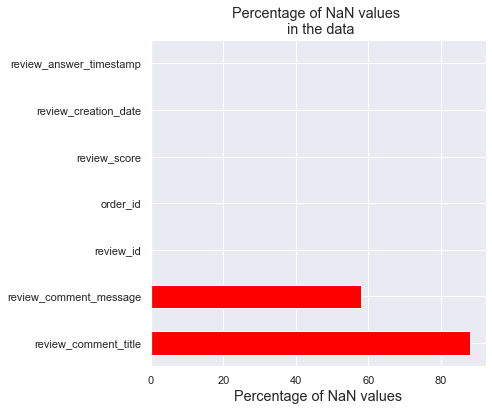

In [17]:
graph_nan_values_per_column(olist_order_reviews_df, (6,6))

From the previous graph we observe that there is more than 40% of missing values for two of the columns. We will eliminate from the data file these two columns.

In [18]:
olist_order_reviews_df = olist_order_reviews_df.drop(columns=['review_comment_message', 'review_comment_title'])

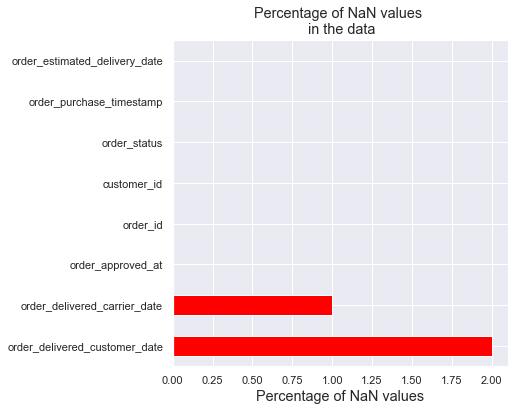

In [19]:
graph_nan_values_per_column(olist_orders_df, (6,6))

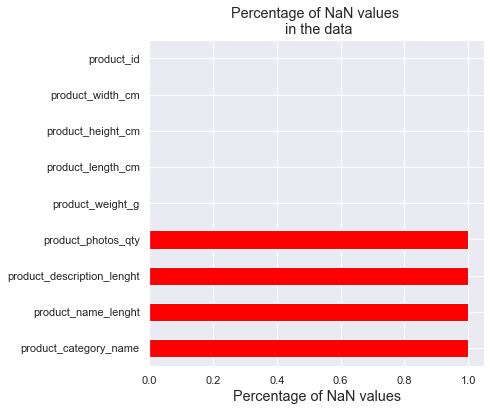

In [20]:
graph_nan_values_per_column(olist_products_df, (6,6))

The two data for Olist orders and products contain a very low percentage of missing values, so we will treat them after.

### Creation of new variables for the order items data set

As pointed out before, since an order can have more than one item of the same product, we can perform some operations to obtain new variables. 

For example, the total freight value of an order is splitted between items, this is:

* The total_freight_value is: 15.10 * 3 = 45.30

We can also compute the total price of the order:

* The total_order_price_all_order_items is: 21.33 * 3 = 63.99

And the total order value can be calculated as:

* The total_order_value (total_freight_value + total_order_price_all_order_items) is: 45.30 + 63.99 = 109.29

We need also to obtain the number of items per order an add it as a column. 

In [21]:
olist_order_items_new_df =  olist_order_items_df.copy()

In [22]:
olist_order_items_new_df['count'] = olist_order_items_new_df.groupby('order_id')['order_id'].transform('count')

In [23]:
olist_order_items_new_df.rename(columns={"count":"order_total_number_of_items"},inplace=True)

In [24]:
olist_order_items_new_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,order_total_number_of_items
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1


### Merge of the tables by keys

#### First merge

We will start by creating a new data frame by performing a first merging of the Olist products data set with the Olist order items data set. We will do it by using the product_id key.

In [25]:
products_and_orders_items_df = pd.merge(olist_products_df, olist_order_items_new_df, on='product_id')

In [26]:
products_and_orders_items_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 16 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   product_id                   112650 non-null  object 
 1   product_category_name        111047 non-null  object 
 2   product_name_lenght          111047 non-null  float64
 3   product_description_lenght   111047 non-null  float64
 4   product_photos_qty           111047 non-null  float64
 5   product_weight_g             112632 non-null  float64
 6   product_length_cm            112632 non-null  float64
 7   product_height_cm            112632 non-null  float64
 8   product_width_cm             112632 non-null  float64
 9   order_id                     112650 non-null  object 
 10  order_item_id                112650 non-null  int64  
 11  seller_id                    112650 non-null  object 
 12  shipping_limit_date          112650 non-null  object 
 13 

We will eliminate some columns from the data frame.

In [27]:
products_and_orders_items_df = products_and_orders_items_df.drop(columns=[ 
                                                                            'product_name_lenght',
                                                                            'product_description_lenght', 
                                                                            'product_photos_qty', 
                                                                            'product_weight_g', 
                                                                            'product_length_cm',
                                                                            'product_height_cm',
                                                                            'product_width_cm',
                                                                            'shipping_limit_date'])

We will verify if there are duplicate values for the product_id, order_id, order_item_id, seller_id keys.

In [28]:
print ("The number of duplicate values in the variable 'product_id' of the products and order items data frame is: {}".format(products_and_orders_items_df.duplicated(subset=['product_id']).sum()))

The number of duplicate values in the variable 'product_id' of the products and order items data frame is: 79699


In [29]:
print ("The number of duplicate values in the variable 'order_id' of the products and order items data frame is: {}".format(products_and_orders_items_df.duplicated(subset=['order_id']).sum()))

The number of duplicate values in the variable 'order_id' of the products and order items data frame is: 13984


In [30]:
print ("The number of duplicate values in the variable 'order_item_id' of the products and order items data frame is: {}".format(products_and_orders_items_df.duplicated(subset=['order_item_id']).sum()))

The number of duplicate values in the variable 'order_item_id' of the products and order items data frame is: 112629


In [31]:
print ("The number of duplicate values in the variable 'seller_id' of the products and order items data frame is: {}".format(products_and_orders_items_df.duplicated(subset=['seller_id']).sum()))

The number of duplicate values in the variable 'seller_id' of the products and order items data frame is: 109555


As we observed, there are duplicate values of product_id and order_id. This is because an order can have several products or items (denoted in order_item_id), and not necessarily the products are the same for an order.

#### Second merge

The second merge that we will perform is by creating a new data frame of the customers and orders data sets by the customer_id key. We will verify if there are duplicate values for the customer_id key.

In [32]:
print ("The number of duplicate values in the variable 'customer_id' of the customers data frame is: {}".format(olist_customers_df.duplicated(subset=['customer_id']).sum()))

The number of duplicate values in the variable 'customer_id' of the customers data frame is: 0


In [33]:
print ("The number of duplicate values in the variable 'customer_id' of the orders data frame is: {}".format(olist_orders_df.duplicated(subset=['order_id']).sum()))

The number of duplicate values in the variable 'customer_id' of the orders data frame is: 0


**We observed that there are not duplicate order_id values. This is because there is only one order registered per customer in the Olist orders data set.**

In [34]:
# print ("The number of duplicate values in the variable 'customer_unique_id' of customers data frame is: {}".format(olist_customers_df.duplicated(subset=['customer_unique_id']).sum()))

In [35]:
customers_and_orders_df = pd.merge(olist_customers_df, olist_orders_df, on='customer_id')

In [36]:
customers_and_orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   customer_id                    99441 non-null  object
 1   customer_unique_id             99441 non-null  object
 2   customer_zip_code_prefix       99441 non-null  int64 
 3   customer_city                  99441 non-null  object
 4   customer_state                 99441 non-null  object
 5   order_id                       99441 non-null  object
 6   order_status                   99441 non-null  object
 7   order_purchase_timestamp       99441 non-null  object
 8   order_approved_at              99281 non-null  object
 9   order_delivered_carrier_date   97658 non-null  object
 10  order_delivered_customer_date  96476 non-null  object
 11  order_estimated_delivery_date  99441 non-null  object
dtypes: int64(1), object(11)
memory usage: 9.9+ MB


We will eliminate the some of the columns.

In [37]:
customers_and_orders_df = customers_and_orders_df.drop(columns=['order_approved_at',
                                                                'order_status',
                                                                'order_delivered_carrier_date', 
                                                                'order_estimated_delivery_date', 
                                                                'order_delivered_customer_date'])

#### Third merge

We will perform a third merge from the customers and orders data frame and order reviews data set. We will verify if there are duplicate values from the order_id.

In [38]:
print ("The number of duplicate values in the variable 'order_id' of the order reviews data frame is: {}".format(olist_order_reviews_df.duplicated(subset=['order_id']).sum()))

The number of duplicate values in the variable 'order_id' of the order reviews data frame is: 551


In [39]:
olist_order_reviews_df[olist_order_reviews_df.duplicated(['order_id'],keep=False)]

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
30,540e7bbb2d06cfb7f85f3a88ba7ac97f,cf73e2cb1f4a9480ed70c154da3d954a,5,2018-01-18 00:00:00,2018-01-18 19:12:30
344,a0a641414ff718ca079b3967ef5c2495,169d7e0fd71d624d306f132acd791cbe,5,2018-03-04 00:00:00,2018-03-06 20:12:53
498,505a882ba08a689682a4afc6eb4e5965,1c308eca3f339414a92e518e2a2e5ee9,2,2017-12-28 00:00:00,2017-12-31 20:25:02
764,c5976a5a98e854fb23d7e03c6754ae60,2002ea16e75277eaa0b5d78632048540,5,2017-08-08 00:00:00,2017-08-10 11:11:29
778,62c7722239b976d943ec0d430cfe890e,1d297b4800ed1a3c5b0944d84c01ee99,3,2017-10-22 00:00:00,2017-10-31 15:33:32
...,...,...,...,...,...
98989,dfb3db02188d809d5cd199496b6da87e,c0db7d31ace61fc360a3eaa34dd3457c,5,2018-02-17 00:00:00,2018-02-19 19:29:19
99108,2c6c08892b83ba4c1be33037c2842294,42ae1967f68c90bb325783ac55d761ce,4,2017-07-03 00:00:00,2017-07-05 19:06:59
99164,2afe63a67dfd99b3038f568fb47ee761,c5334d330e36d2a810a7a13c72e135ee,5,2018-03-03 00:00:00,2018-03-04 22:56:47
99178,44d1e9165ec54b1d89d33594856af859,a7dbcf5043158d6fa72859eead2f3d10,4,2017-05-24 00:00:00,2017-05-24 23:15:21


In [40]:
olist_order_reviews_df[olist_order_reviews_df['order_id'] == 'cf73e2cb1f4a9480ed70c154da3d954a']

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
30,540e7bbb2d06cfb7f85f3a88ba7ac97f,cf73e2cb1f4a9480ed70c154da3d954a,5,2018-01-18 00:00:00,2018-01-18 19:12:30
3109,aa193e76d35950c4ae988237bb36ed2b,cf73e2cb1f4a9480ed70c154da3d954a,5,2018-01-18 00:00:00,2018-01-18 17:36:45


From the previous result we observe that for some orders there are different reviews. This may be attributed to the fact that some customers may have changed their review for an order.

In [41]:
print ("The number of duplicate values in the variable 'order_id' of customers and orders data frame is: {}".format(customers_and_orders_df.duplicated(subset=['order_id']).sum()))

The number of duplicate values in the variable 'order_id' of customers and orders data frame is: 0


In [42]:
reviews_customers_and_orders_df = pd.merge(olist_order_reviews_df, customers_and_orders_df, on='order_id')

In [43]:
reviews_customers_and_orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99224 entries, 0 to 99223
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   review_id                 99224 non-null  object
 1   order_id                  99224 non-null  object
 2   review_score              99224 non-null  int64 
 3   review_creation_date      99224 non-null  object
 4   review_answer_timestamp   99224 non-null  object
 5   customer_id               99224 non-null  object
 6   customer_unique_id        99224 non-null  object
 7   customer_zip_code_prefix  99224 non-null  int64 
 8   customer_city             99224 non-null  object
 9   customer_state            99224 non-null  object
 10  order_purchase_timestamp  99224 non-null  object
dtypes: int64(2), object(9)
memory usage: 9.1+ MB


We will eliminate the some of the columns.

In [44]:
reviews_customers_and_orders_df = reviews_customers_and_orders_df.drop(columns=['review_creation_date', 'review_answer_timestamp'])

#### Fourth merge

We will perform a fourth merge from the customers payment methods, customers information, orders information and order reviews data sets.

In [45]:
print ("The number of duplicate values in the variable 'order_id' of the payment methods data frame is: {}".format(olist_order_payments_df.duplicated(subset=['order_id']).sum()))

The number of duplicate values in the variable 'order_id' of the payment methods data frame is: 4446


In [46]:
olist_order_payments_df[olist_order_payments_df.duplicated(['order_id'],keep=False)]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
25,5cfd514482e22bc992e7693f0e3e8df7,2,voucher,1,45.17
35,b2bb080b6bc860118a246fd9b6fad6da,1,credit_card,1,173.84
75,3689194c14ad4e2e7361ebd1df0e77b0,2,voucher,1,57.53
84,723e462ce1ee50e024887c0b403130f3,1,credit_card,1,13.80
102,21b8b46679ea6482cbf911d960490048,2,voucher,1,43.12
...,...,...,...,...,...
103778,fd86c80924b4be8fb7f58c4ecc680dae,1,credit_card,1,76.10
103817,6d4616de4341417e17978fe57aec1c46,1,credit_card,1,19.18
103860,31bc09fdbd701a7a4f9b55b5955b8687,6,voucher,1,77.99
103869,c9b01bef18eb84888f0fd071b8413b38,1,credit_card,6,238.16


In [47]:
olist_order_payments_df[olist_order_payments_df['order_id'] == '5cfd514482e22bc992e7693f0e3e8df7']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
25,5cfd514482e22bc992e7693f0e3e8df7,2,voucher,1,45.17
57742,5cfd514482e22bc992e7693f0e3e8df7,1,credit_card,4,665.41


We have duplicate order_id values because a customer may pay an order with more than one payment method.

In [48]:
print ("The number of duplicate values in the variable 'order_id' of reviews, customers and orders data frame is: {}".format(reviews_customers_and_orders_df.duplicated(subset=['order_id']).sum()))

The number of duplicate values in the variable 'order_id' of reviews, customers and orders data frame is: 551


In [49]:
payments_reviews_customers_and_orders_df = pd.merge(olist_order_payments_df, reviews_customers_and_orders_df, on='order_id')

In [50]:
payments_reviews_customers_and_orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103677 entries, 0 to 103676
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   order_id                  103677 non-null  object 
 1   payment_sequential        103677 non-null  int64  
 2   payment_type              103677 non-null  object 
 3   payment_installments      103677 non-null  int64  
 4   payment_value             103677 non-null  float64
 5   review_id                 103677 non-null  object 
 6   review_score              103677 non-null  int64  
 7   customer_id               103677 non-null  object 
 8   customer_unique_id        103677 non-null  object 
 9   customer_zip_code_prefix  103677 non-null  int64  
 10  customer_city             103677 non-null  object 
 11  customer_state            103677 non-null  object 
 12  order_purchase_timestamp  103677 non-null  object 
dtypes: float64(1), int64(4), object(8)
memory us

In [51]:
payments_reviews_customers_and_orders_df = payments_reviews_customers_and_orders_df.drop(columns=['payment_sequential', 'payment_installments'])

#### Fifth merge

The fifth merge that we will perform will create a data frame that contains information about the payments, reviews, customers, orders, products and order items data sets.

In [52]:
payments_reviews_customers_orders_products_order_items_df = pd.merge(products_and_orders_items_df, payments_reviews_customers_and_orders_df, on='order_id')

In [53]:
payments_reviews_customers_orders_products_order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117329 entries, 0 to 117328
Data columns (total 18 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   product_id                   117329 non-null  object 
 1   product_category_name        115634 non-null  object 
 2   order_id                     117329 non-null  object 
 3   order_item_id                117329 non-null  int64  
 4   seller_id                    117329 non-null  object 
 5   price                        117329 non-null  float64
 6   freight_value                117329 non-null  float64
 7   order_total_number_of_items  117329 non-null  int64  
 8   payment_type                 117329 non-null  object 
 9   payment_value                117329 non-null  float64
 10  review_id                    117329 non-null  object 
 11  review_score                 117329 non-null  int64  
 12  customer_id                  117329 non-null  object 
 13 

#### Sixth merge - for product category translation

We will now include the product category name translation in English data frame, and drop the column category name in Portuguese. We will then perform a regroup of categories to have a more clean data.

In [54]:
payments_reviews_customers_orders_products_order_items_df = pd.merge(payments_reviews_customers_orders_products_order_items_df, product_category_name_translation_df, on='product_category_name')

In [55]:
payments_reviews_customers_orders_products_order_items_df = payments_reviews_customers_orders_products_order_items_df.drop(columns=['product_category_name'])

In [56]:
payments_reviews_customers_orders_products_order_items_df['product_category_name_english'].unique()

array(['perfumery', 'art', 'sports_leisure', 'baby', 'housewares',
       'musical_instruments', 'cool_stuff', 'furniture_decor',
       'home_appliances', 'toys', 'bed_bath_table',
       'construction_tools_safety', 'computers_accessories',
       'health_beauty', 'luggage_accessories', 'garden_tools',
       'office_furniture', 'auto', 'electronics', 'fashion_shoes',
       'telephony', 'stationery', 'fashion_bags_accessories', 'computers',
       'home_construction', 'watches_gifts',
       'construction_tools_construction', 'pet_shop', 'small_appliances',
       'agro_industry_and_commerce', 'furniture_living_room',
       'signaling_and_security', 'air_conditioning', 'consoles_games',
       'books_general_interest', 'costruction_tools_tools',
       'fashion_underwear_beach',
       'kitchen_dining_laundry_garden_furniture',
       'industry_commerce_and_business', 'fixed_telephony',
       'construction_tools_lights', 'fashion_male_clothing',
       'books_technical', 'home_app

In [57]:
product_category_en = {
#home
'furniture_living_room' : 'home',
'furniture_mattress_and_upholstery' : 'home',
'furniture_bedroom' : 'home',
'furniture_decor' : 'home',
'bed_bath_table' : 'home',
'kitchen_dining_laundry_garden_furniture' : 'home',
'la_cuisine' : 'home',
'home_confort' : 'home',
'home_comfort_2' : 'home',
'housewares' : 'home', 
#appliances
'small_appliances' : 'appliances',
'small_appliances_home_oven_and_coffee' : 'appliances',
'home_appliances_2' : 'appliances',
'home_appliances' : 'appliances',  
#construction
'construction_tools_construction': 'construction',
'costruction_tools_garden': 'construction',
'costruction_tools_tools': 'construction',
'construction_tools_safety': 'construction',
'construction_tools_lights': 'construction',
'home_construction': 'construction',
'air_conditioning': 'construction',
#office
'office_furniture' : 'office',
'industry_commerce_and_business' : 'office',
'stationery' : 'office',
'agro_industry_and_commerce' : 'office',
'signaling_and_security' : 'office',
'furnitures' : 'office',
'security_and_services' : 'office',
#electronics
'telephony' : 'electronics',
'electronics': 'electronics',
'computers_accessories': 'electronics',
'consoles_games': 'electronics',
'fixed_telephony': 'electronics',
'audio': 'electronics',
'computers': 'electronics',
'tablets_printing_image': 'electronics',
#sports_leisure
'sports_leisure' : 'sports_leisure',
#arts
'musical_instruments': 'arts',
'books' : 'arts',
'books_imported': 'arts',
'books_general_interest': 'arts',
'books_technical': 'arts',
'art': 'arts',
'toys': 'arts',
'cine_photo': 'arts',
'cds_dvds_musicals': 'arts',
'music': 'arts',
'dvds_blu_ray': 'arts',
'arts_and_craftmanship': 'arts',
#fashion
'watches_gifts' : 'fashion',
'luggage_accessories': 'fashion',
'fashion_bags_accessories' : 'fashion',
'fashion_underwear_beach' : 'fashion',
'fashion_shoes' : 'fashion', 
'fashion_male_clothing' : 'fashion',
'fashio_female_clothing' : 'fashion',
'fashion_sport' : 'fashion',
'fashion_childrens_clothes' : 'fashion',
#health_beauty
'health_beauty' : 'health_beauty', 
'baby': 'health_beauty',
'diapers_and_hygiene' : 'health_beauty',
'perfumery' : 'health_beauty',
#garden and pets
'flowers' : 'garden_pets',
'pet_shop' : 'garden_pets',
'garden_tools' : 'garden_pets',
#auto
'auto' : 'auto',
#food_drinks
'food_drink' : 'food_drinks',
'food' : 'food_drinks',
'drinks' : 'food_drinks',
#other
'market_place' : 'other', 
'cool_stuff' : 'other',
'party_supplies': 'other',
'christmas_supplies' : 'other'}

for key, value in product_category_en.items():
    payments_reviews_customers_orders_products_order_items_df['product_category_name_english'].loc[payments_reviews_customers_orders_products_order_items_df["product_category_name_english"].str.contains(key, case=False, regex=False, na=False)] = value

C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


<AxesSubplot:xlabel='count', ylabel='product_category_name_english'>

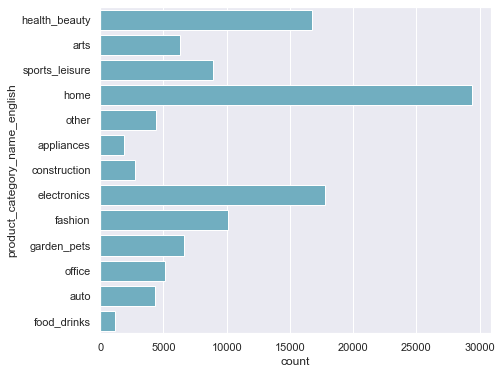

In [58]:
plt.subplots(figsize=(7, 6))
sns.countplot(y="product_category_name_english", data=payments_reviews_customers_orders_products_order_items_df, color="c")

### Creation of a final data frame for segmentation analysis

We will now create dummy variables from the product category values. We will create such variables per unique value from the order id.

In [59]:
dummies_product_category_variables = payments_reviews_customers_orders_products_order_items_df.copy()

In [60]:
# See reference code: https://stackoverflow.com/questions/63636807/pandas-group-by-and-get-dummies

dummies_product_category_variables = dummies_product_category_variables.set_index('order_id')['product_category_name_english'].str.get_dummies().max(level=0).reset_index()

C:\Users\ASUS\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  This is separate from the ipykernel package so we can avoid doing imports until


In [61]:
dummies_product_category_variables.head()

,order_id,appliances,arts,auto,construction,electronics,fashion,food_drinks,garden_pets,health_beauty,home,office,other,sports_leisure
0,e17e4f88e31525f7deef66779844ddce,0,0,0,0,0,0,0,0,1,0,0,0,0
1,048cc42e03ca8d43c729adf6962cb348,0,0,0,0,0,0,0,0,1,0,0,0,0
2,5fa78e91b5cb84b6a8ccc42733f95742,0,0,0,0,0,0,0,0,1,0,0,0,0
3,24b1c4d88fdb7a2dc87f8ecc7d8f47f1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,7b13c77c64a9a956500cbf1a9a23798d,0,0,0,0,0,0,0,0,1,0,0,0,0


In [62]:
print ("The number of duplicate values in the variable 'order_id' of dummies product category variables data frame is: {}".format(dummies_product_category_variables.duplicated(subset=['order_id']).sum()))

The number of duplicate values in the variable 'order_id' of dummies product category variables data frame is: 0


Now we will create a data frame that is grouped per unique value of order_id and that keeps the maximum value of items or products placed in an order. In this sense, we will get rid of the duplicate values of order_id resulting from placing different products in an order.

In [63]:
payments_reviews_customers_orders_products_order_items_new_df = payments_reviews_customers_orders_products_order_items_df.copy()

In [64]:
payments_reviews_customers_orders_products_order_items_new_df = payments_reviews_customers_orders_products_order_items_new_df.drop_duplicates('order_id', keep='last')

In [65]:
final_df_for_segmentation_analysis = pd.merge(payments_reviews_customers_orders_products_order_items_new_df, dummies_product_category_variables, on='order_id')

In [66]:
final_df_for_segmentation_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96516 entries, 0 to 96515
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     96516 non-null  object 
 1   order_id                       96516 non-null  object 
 2   order_item_id                  96516 non-null  int64  
 3   seller_id                      96516 non-null  object 
 4   price                          96516 non-null  float64
 5   freight_value                  96516 non-null  float64
 6   order_total_number_of_items    96516 non-null  int64  
 7   payment_type                   96516 non-null  object 
 8   payment_value                  96516 non-null  float64
 9   review_id                      96516 non-null  object 
 10  review_score                   96516 non-null  int64  
 11  customer_id                    96516 non-null  object 
 12  customer_unique_id             96516 non-null 

## Use of RMF method

So far we have created a data frame that contains the main indicators that we will use for our analysis. 

For the clients segmentation we will start by using a method called RFM, which is widely used for customer analysis in market research.

**We will use the RFM method to compare the clients segmentation with other clustering methods, such as K-means.***

**RFM** stands for the three dimensions:

* **Recency** – How recently did the customer purchase?
* **Frequency** – How often do they purchase?
* **Monetary Value** – How much do they spend?

See reference: https://en.wikipedia.org/wiki/RFM_(market_research)

To compute the **Recency**, we will compute the number of days that has been since the a customer placed an order. The **frequency** will be refered to the amount of products that a custome placed in an order, and the **Monetary value** is the order payment value.

In business analytics, we often use this concept to divide customers into different segments, like high-value customers, medium value customers or low-value customers, and similarly many others.

See reference: https://www.geeksforgeeks.org/rfm-analysis-analysis-using-python/

In the RFM method, we need to create a score with is based in heuristic rules where **R + F + M = RFM Score**. This is, it depends on the company's rules. For example, a company can give more priority to the Monetary Value. This is used as a rule to compute the RFM Score. So in general, we multiply the terms R, F and M by constant a,b and c, to determine depending on the priorities of the company.

For example:

**a(Recency) + b(Frequency) + c(Monetary Value) = RFM Score**

Rating Customer based upon the RFM Score:

* RFM Score = 5: Top customer
* RMF Score = 4: High value customer
* RMF Score = 3: Medium value customer
* RMF Score = 2: Low-value customer
* RMF Score = 1: Lost customer

### Creation of RFM table

In [133]:
rfm_df =  final_df_for_segmentation_analysis.copy()

We already have the Frequence of bought products, which is the variable 'order_total_number_of_items'. Now we will compute the number of days that have past from a customer's last order placement. The monetary value is given by the variable 'payment_value'.

In [134]:
columns_for_rfm = ['order_id', 'customer_id', 'order_total_number_of_items', 'order_purchase_timestamp', 'payment_value']

In [135]:
rfm_df = rfm_df[columns_for_rfm]

In [136]:
rfm_df['order_purchase_timestamp'] = pd.to_datetime(rfm_df['order_purchase_timestamp']).dt.date

In [137]:
recent_date = rfm_df['order_purchase_timestamp'].max()
rfm_df['Recency'] = rfm_df['order_purchase_timestamp'].apply(lambda x: (recent_date - x).days)
rfm_df.head()

,order_id,customer_id,order_total_number_of_items,order_purchase_timestamp,payment_value,Recency
0,e17e4f88e31525f7deef66779844ddce,f8a3e963a310aa58b60a5b1fed5bceb5,1,2018-04-24,18.30,132
1,048cc42e03ca8d43c729adf6962cb348,12a2c614dfc8926e793516b1638c7471,1,2017-11-16,24.68,291
2,5fa78e91b5cb84b6a8ccc42733f95742,c15eed3881abc9e06763c989679c5094,1,2017-11-30,24.68,277
3,24b1c4d88fdb7a2dc87f8ecc7d8f47f1,6d699e3ab0fd90fffb3d1379d937de77,1,2017-07-28,356.13,402
4,7b13c77c64a9a956500cbf1a9a23798d,45d942b1af5529f8990f27848a40e645,1,2018-05-17,298.48,109


In [138]:
rfm_df.rename(columns={'order_total_number_of_items': 'Frequency',
                        'payment_value': 'Monetary_value'}, inplace=True)

In [139]:
rfm_df = rfm_df.drop(columns=['order_id', 'order_purchase_timestamp'])
rfm_df.head()

,customer_id,Frequency,Monetary_value,Recency
0,f8a3e963a310aa58b60a5b1fed5bceb5,1,18.30,132
1,12a2c614dfc8926e793516b1638c7471,1,24.68,291
2,c15eed3881abc9e06763c989679c5094,1,24.68,277
3,6d699e3ab0fd90fffb3d1379d937de77,1,356.13,402
4,45d942b1af5529f8990f27848a40e645,1,298.48,109


### Ranking customers based on their Recency, Frequency, and Monetary value

We will normalize the rank of the customers to analyze the ranking.

In [140]:
rfm_df['R_rank'] = rfm_df['Recency'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['Monetary_value'].rank(ascending=True)

In [141]:
 # normalizing the rank of the customers
rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())
rfm_df['M_rank_norm'] = (rfm_df['F_rank']/rfm_df['M_rank'].max())

rfm_df.head()

,customer_id,Frequency,Monetary_value,Recency,R_rank,F_rank,M_rank,R_rank_norm,F_rank_norm,M_rank_norm
0,f8a3e963a310aa58b60a5b1fed5bceb5,1,18.30,132,69570.5,43465.0,919.0,0.720818,0.45034,0.45034
1,12a2c614dfc8926e793516b1638c7471,1,24.68,291,33466.0,43465.0,2363.0,0.346740,0.45034,0.45034
2,c15eed3881abc9e06763c989679c5094,1,24.68,277,38161.0,43465.0,2363.0,0.395385,0.45034,0.45034
3,6d699e3ab0fd90fffb3d1379d937de77,1,356.13,402,17748.5,43465.0,89319.5,0.183892,0.45034,0.45034
4,45d942b1af5529f8990f27848a40e645,1,298.48,109,75681.5,43465.0,86618.5,0.784134,0.45034,0.45034


In [142]:
rfm_df.describe()

,Frequency,Monetary_value,Recency,R_rank,F_rank,M_rank,R_rank_norm,F_rank_norm,M_rank_norm
count,96516.000000,96516.000000,96516.000000,96516.000000,96516.000000,96516.000000,96516.000000,96516.000000,96516.000000
mean,1.141396,157.924715,244.835188,48258.500000,48258.500000,48258.500000,0.500005,0.500005,0.500005
std,0.535100,217.301999,153.416102,27861.823784,14448.653243,27861.912354,0.288676,0.149702,0.149702
min,1.000000,0.000000,0.000000,1.000000,43465.000000,1.500000,0.000010,0.450340,0.450340
25%,1.000000,60.090000,120.000000,24106.000000,43465.000000,24122.000000,0.249762,0.450340,0.450340
50%,1.000000,103.140000,225.000000,48334.500000,43465.000000,48261.000000,0.500793,0.450340,0.450340
75%,1.000000,175.292500,355.000000,72450.000000,43465.000000,72388.000000,0.750653,0.450340,0.450340
max,21.000000,13664.080000,729.000000,96516.000000,96516.000000,96516.000000,1.000000,1.000000,1.000000


### Calculating RFM score

As we previously mentioned, we need to create a score with is based in heuristic rules where **R + F + M = RFM Score**. Based on this score, we will segment the customers.

We will use the rule:

**40(Recency) + 40(Frequency) + 20(Monetary Value) = RFM Score**

Here we give equally importance to the Recency and the Frequency, this is, to those customers who recently placed orders and bought more than one product in an order. Then, we gave less importance to the Monetary value. 

In [145]:
rfm_df['RFM_Score'] = 40*rfm_df['R_rank_norm'] + 40*rfm_df['F_rank_norm'] + 20*rfm_df['M_rank_norm']
rfm_df['RFM_Score'] *= 0.05
rfm_df = rfm_df.round(0)
rfm_df.head()

,customer_id,Frequency,Monetary_value,Recency,R_rank,F_rank,M_rank,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score
0,f8a3e963a310aa58b60a5b1fed5bceb5,1,18.0,132,69570.0,43465.0,919.0,1.0,0.0,0.0,3.0
1,12a2c614dfc8926e793516b1638c7471,1,25.0,291,33466.0,43465.0,2363.0,0.0,0.0,0.0,2.0
2,c15eed3881abc9e06763c989679c5094,1,25.0,277,38161.0,43465.0,2363.0,0.0,0.0,0.0,2.0
3,6d699e3ab0fd90fffb3d1379d937de77,1,356.0,402,17748.0,43465.0,89320.0,0.0,0.0,0.0,2.0
4,45d942b1af5529f8990f27848a40e645,1,298.0,109,75682.0,43465.0,86618.0,1.0,0.0,0.0,3.0


In [146]:
rfm_df = rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank', 'R_rank_norm', 'F_rank_norm', 'M_rank_norm'])
rfm_df.describe()

,Frequency,Monetary_value,Recency,RFM_Score
count,96516.000000,96516.000000,96516.000000,96516.000000
mean,1.141396,157.928685,244.835188,2.499751
std,0.535100,217.303129,153.416102,0.764729
min,1.000000,0.000000,0.000000,1.000000
25%,1.000000,60.000000,120.000000,2.000000
50%,1.000000,103.000000,225.000000,2.000000
75%,1.000000,175.000000,355.000000,3.000000
max,21.000000,13664.000000,729.000000,5.000000


In [151]:
rfm_df["Customer_segment"] = np.where(rfm_df['RFM_Score'] == 5, "Top customer",
                            (np.where(rfm_df['RFM_Score'] == 4, "High value customer",
                            (np.where(rfm_df['RFM_Score'] == 3, "Medium value customer",
                             np.where(rfm_df['RFM_Score'] > 1.5, 'Low value customer', 'Lost customer'))))))
rfm_df.head()

,customer_id,Frequency,Monetary_value,Recency,RFM_Score,Customer_segment
0,f8a3e963a310aa58b60a5b1fed5bceb5,1,18.0,132,3.0,Medium value customer
1,12a2c614dfc8926e793516b1638c7471,1,25.0,291,2.0,Low value customer
2,c15eed3881abc9e06763c989679c5094,1,25.0,277,2.0,Low value customer
3,6d699e3ab0fd90fffb3d1379d937de77,1,356.0,402,2.0,Low value customer
4,45d942b1af5529f8990f27848a40e645,1,298.0,109,3.0,Medium value customer


* RFM Score = 5: Top customer
* RMF Score = 4: High value customer
* RMF Score = 3: Medium value customer
* RMF Score = 2: Low-value customer
* RMF Score = 1: Lost customer

### Visualizing the customer segments

We will use a pie plot to display all segments of customers.

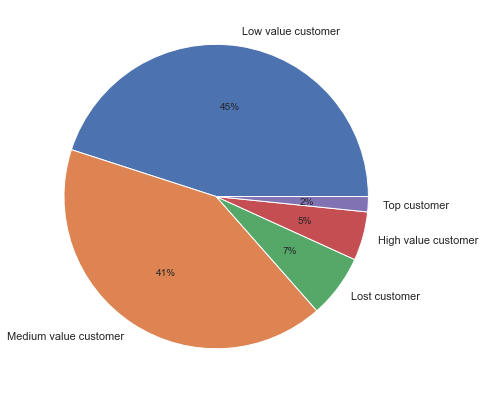

In [152]:
plt.subplots(figsize=(7,7))
plt.pie(rfm_df.Customer_segment.value_counts(), labels=rfm_df.Customer_segment.value_counts().index, autopct='%.0f%%')
plt.show()

## K-Means segmentation

In [80]:
segmentation_k_means_df = final_df_for_segmentation_analysis.copy()

In [81]:
# segmentation_k_means_df.info()

In [82]:
segmentation_k_means_df = segmentation_k_means_df.drop(columns=['product_id',
                                                                'order_id',
                                                                'order_item_id',
                                                                'seller_id',
                                                                'price',
                                                                'freight_value',
                                                                'review_id',
                                                                'customer_id',
                                                                'customer_unique_id'])

In [83]:
segmentation_k_means_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96516 entries, 0 to 96515
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_total_number_of_items    96516 non-null  int64  
 1   payment_type                   96516 non-null  object 
 2   payment_value                  96516 non-null  float64
 3   review_score                   96516 non-null  int64  
 4   customer_zip_code_prefix       96516 non-null  int64  
 5   customer_city                  96516 non-null  object 
 6   customer_state                 96516 non-null  object 
 7   order_purchase_timestamp       96516 non-null  object 
 8   product_category_name_english  96516 non-null  object 
 9   appliances                     96516 non-null  int64  
 10  arts                           96516 non-null  int64  
 11  auto                           96516 non-null  int64  
 12  construction                   96516 non-null 

### Transformation of categorical variables into numerical values

In [84]:
categorical_columns = ['payment_type', 'customer_city', 'customer_state', 'order_purchase_timestamp', 'product_category_name_english']

In [85]:
segmentation_k_means_new_df_transformed_all_numerical = segmentation_k_means_df.copy()

In [87]:
segmentation_k_means_new_df_transformed_all_numerical = segmentation_k_means_new_df_transformed_all_numerical.astype({'payment_type': 'category', 
                                                        'customer_city': 'category', 
                                                        'customer_state': 'category',
                                                        'order_purchase_timestamp': 'category',
                                                        'product_category_name_english': 'category'})

columns_to_categorical = segmentation_k_means_new_df_transformed_all_numerical.select_dtypes(['category']).columns
segmentation_k_means_new_df_transformed_all_numerical[columns_to_categorical] = segmentation_k_means_new_df_transformed_all_numerical[columns_to_categorical].apply(lambda x: x.cat.codes)

We have now data without missing values and we have transformed our categorical variables into numerical.

In [88]:
segmentation_k_means_new_df_transformed_all_numerical.describe()

,order_total_number_of_items,payment_type,payment_value,review_score,customer_zip_code_prefix,customer_city,customer_state,order_purchase_timestamp,product_category_name_english,appliances,...,construction,electronics,fashion,food_drinks,garden_pets,health_beauty,home,office,other,sports_leisure
count,96516.000000,96516.000000,96516.000000,96516.000000,96516.000000,96516.000000,96516.000000,96516.000000,96516.000000,96516.000000,...,96516.000000,96516.000000,96516.000000,96516.000000,96516.000000,96516.000000,96516.000000,96516.000000,96516.000000,96516.000000
mean,1.141396,0.873088,157.924715,4.107298,35163.974543,2364.113256,18.650835,47999.980635,6.868944,0.017531,...,0.022473,0.157487,0.093218,0.010019,0.054126,0.153291,0.234189,0.042604,0.041475,0.079458
std,0.535100,0.558196,217.301999,1.329258,29810.746531,1203.227058,7.083245,27702.156883,3.195846,0.131239,...,0.148217,0.364261,0.290739,0.099593,0.226267,0.360269,0.423493,0.201964,0.199387,0.270454
min,1.000000,0.000000,0.000000,1.000000,1003.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,60.090000,4.000000,11368.750000,1263.000000,12.000000,24011.750000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,103.140000,5.000000,24422.000000,2707.000000,22.000000,48000.500000,8.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,175.292500,5.000000,59015.000000,3545.000000,25.000000,71986.250000,9.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,21.000000,3.000000,13664.080000,5.000000,99980.000000,4092.000000,26.000000,95988.000000,12.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Feature transformation and standardization for outlier detection 

#### Log-transform for skewed distributions

We are going to apply a logaritmic transformation to the variables that are more asymmetrical from our data. Log transformation also de-emphasizes outliers and allows us to potentially obtain a bell-shaped distribution. The idea is that taking the log of the data can restore symmetry to the data.

See references: 

* https://www.sciencedirect.com/topics/computer-science/log-transformation#:~:text=Log%20transformation%20also%20de%2Demphasizes,restore%20symmetry%20to%20the%20data.&text=If%20the%20distance%20between%20each,the%20variable%20skews%20the%20distance
* https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/

In [153]:
# plt.subplots(figsize=(7, 8))
# for i in segmentation_k_means_new_df_transformed_all_numerical.columns:
#     sns.histplot(data = segmentation_k_means_new_df_transformed_all_numerical, x=i, color="blue")
#     plt.show()

In [94]:
df_log_transformed = segmentation_k_means_new_df_transformed_all_numerical.copy()

In [95]:
columns_for_log_transformation = ['order_total_number_of_items',
                                    'payment_value', 
                                    'review_score', 
                                    'customer_zip_code_prefix'
                                    ]

In [96]:
for col in df_log_transformed.columns:
    if col in columns_for_log_transformation:
        df_log_transformed[col] = np.log10(df_log_transformed[col] + 0.1) 

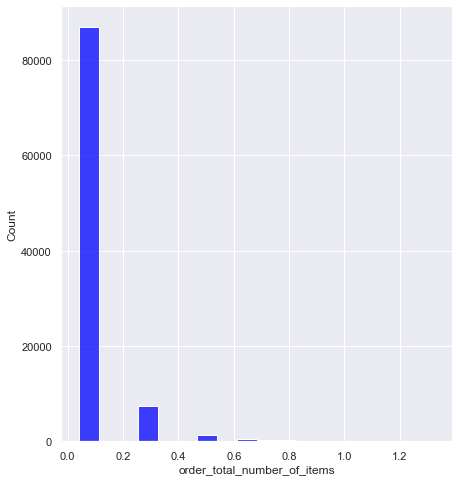

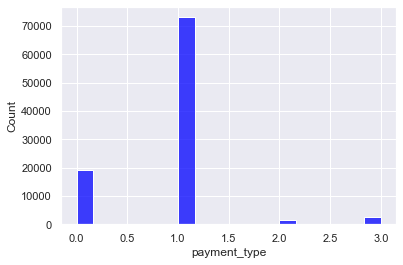

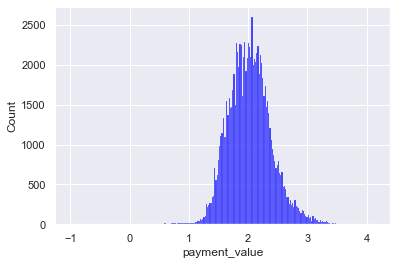

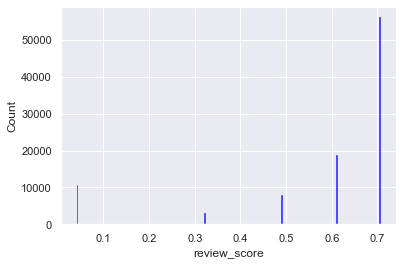

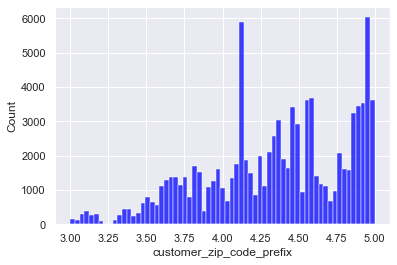

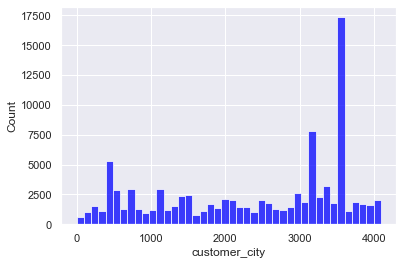

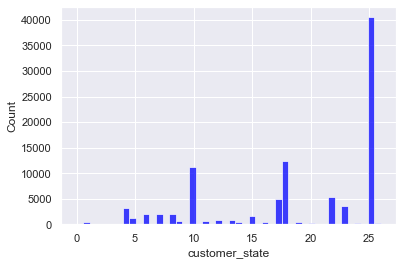

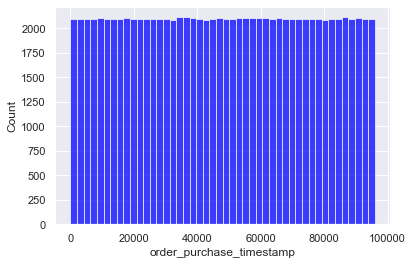

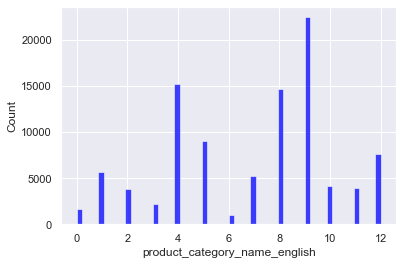

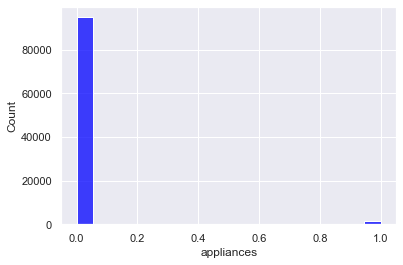

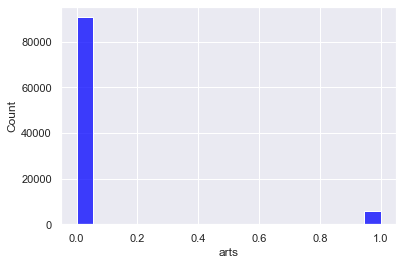

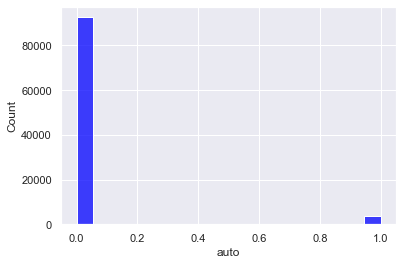

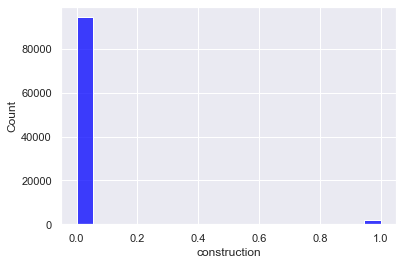

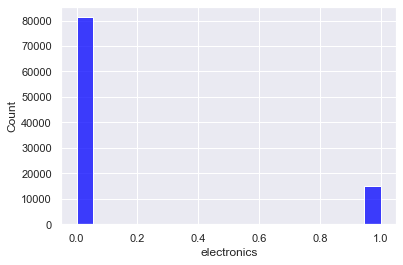

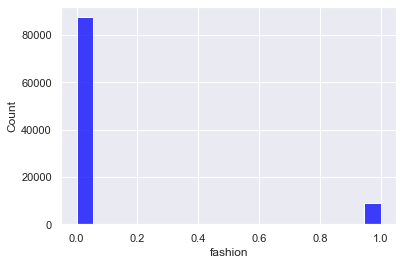

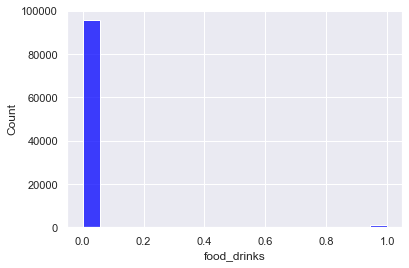

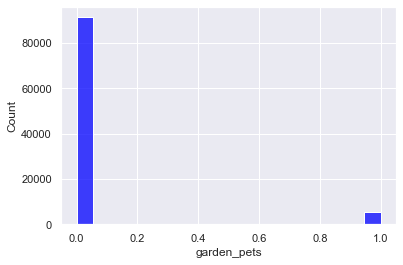

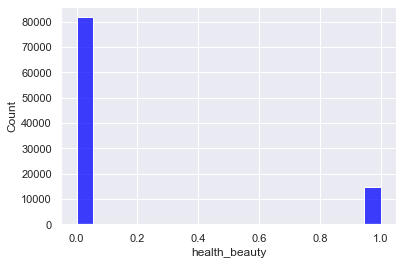

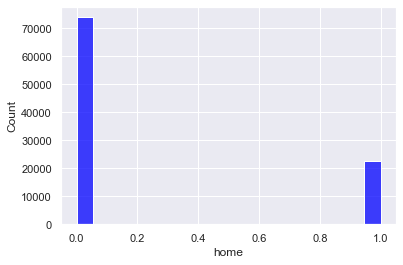

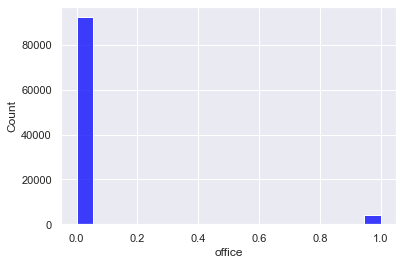

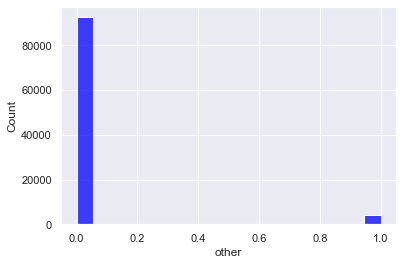

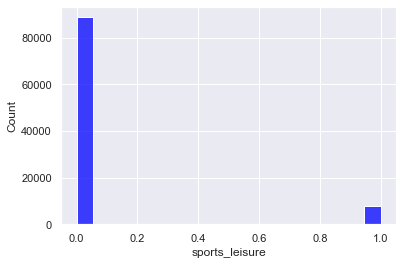

In [97]:
df_log_transformed.describe()
plt.subplots(figsize=(7, 8))
for i in df_log_transformed.columns:
    sns.histplot(data=df_log_transformed, x=i, color="blue")
    plt.show()

#### Z-scores standardization

We are going to use Z-scores to detect outliers in our data, and to standardize it. See references: 

* https://www.mygreatlearning.com/blog/outlier-analysis-explained/
* https://www.codecademy.com/article/normalization
* https://jamesmccaffrey.wordpress.com/2020/05/27/should-you-normalize-and-encode-data-before-train-test-splitting-or-after-splitting/

In [98]:
df_for_z_scores = df_log_transformed.copy()

In [ ]:
# columns_for_z_scores = ['order_total_number_of_items',
#                                     'payment_type',
#                                     'payment_value', 
#                                     'review_score', 
#                                     'customer_zip_code_prefix',
#                                     'customer_city',
#                                     'customer_state',
#                                     'order_purchase_timestamp',
#                                     'product_category_name_english'
#                                     ]

In [99]:
# standardize data
df_standardized = (df_for_z_scores - df_for_z_scores.mean()) / df_for_z_scores.std()

In [154]:
# df_standardized.describe()
# plt.subplots(figsize=(7, 8))
# for i in df_standardized.columns:
#     sns.histplot(data=df_standardized, x=i, color="blue")
#     plt.show()

In [102]:
df_standardized_without_outliers = df_standardized.loc[
                                                    (df_standardized['order_total_number_of_items'] >= -4) & (df_standardized['order_total_number_of_items'] <= 4)
                                                    & (df_standardized['payment_value'] >= -4) & (df_standardized['payment_value'] <= 4)
                                                    & (df_standardized['appliances'] >= -4) & (df_standardized['appliances'] <= 4)
                                                    & (df_standardized['construction'] >= -4) & (df_standardized['construction'] <= 4)
                                                    & (df_standardized['food_drinks'] >= -4) & (df_standardized['food_drinks'] <= 4)
                                                    ]

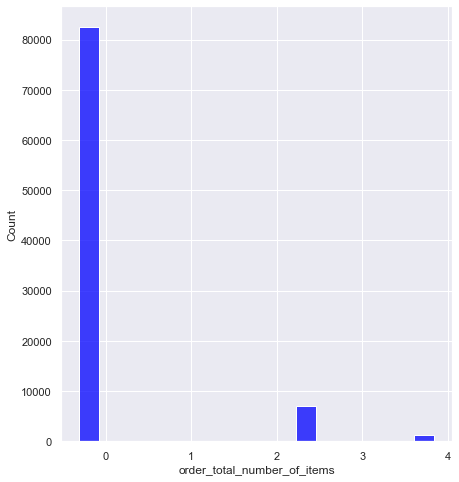

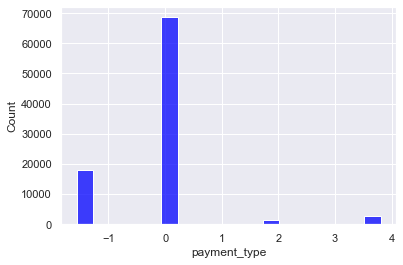

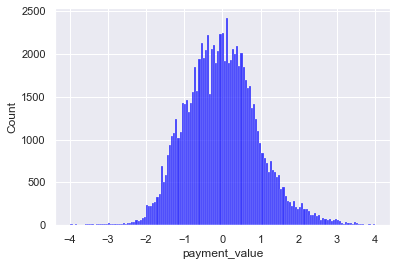

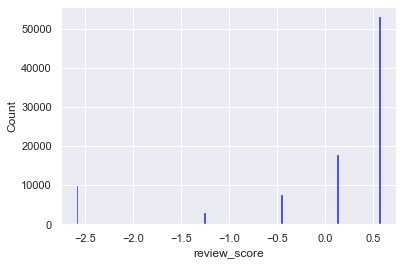

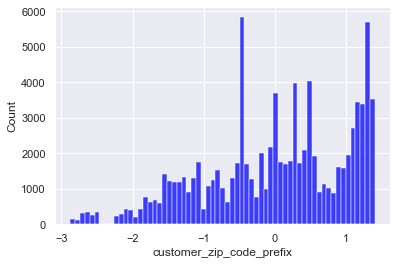

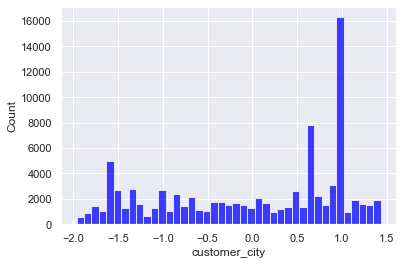

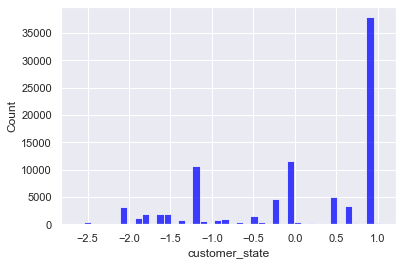

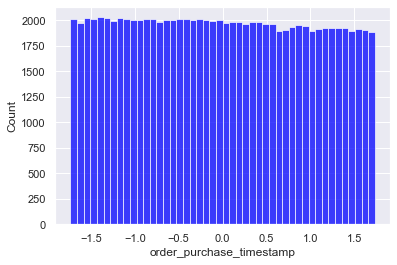

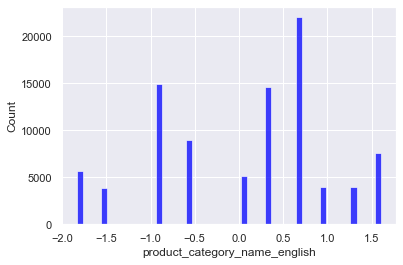

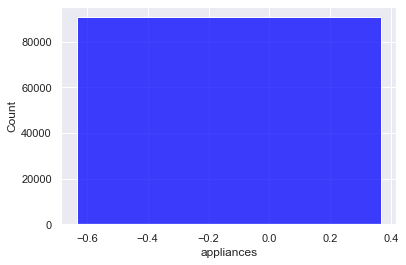

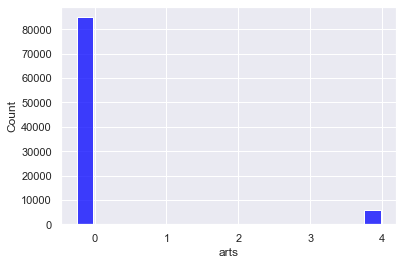

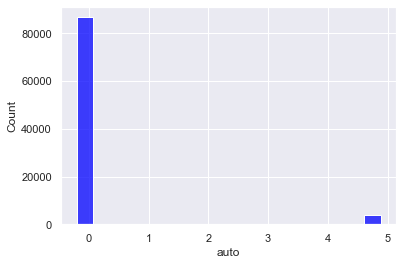

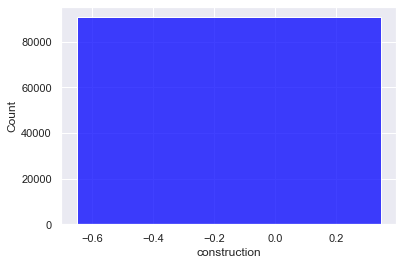

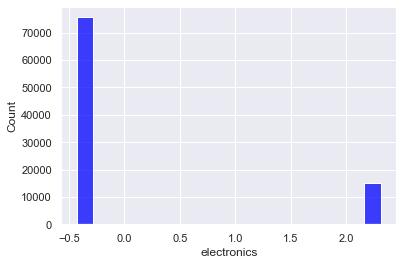

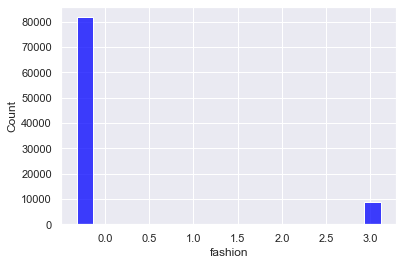

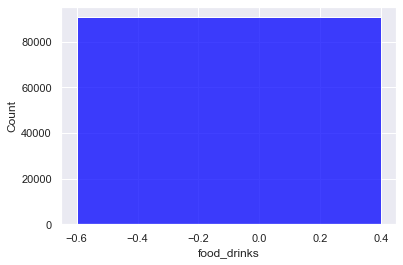

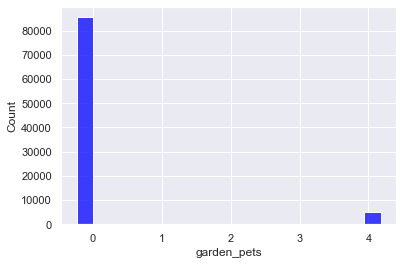

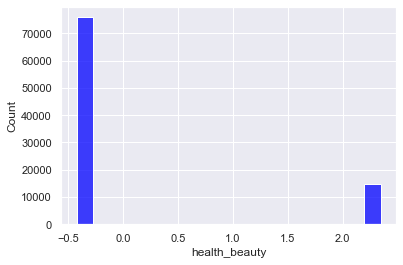

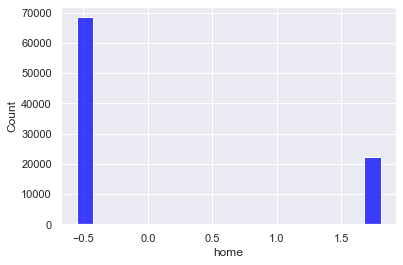

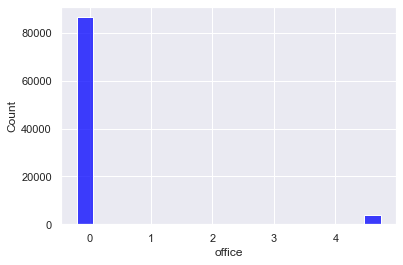

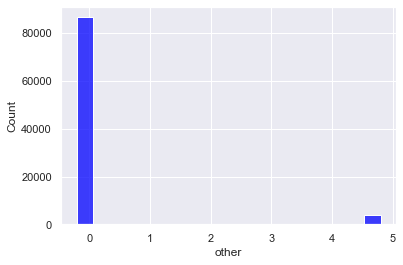

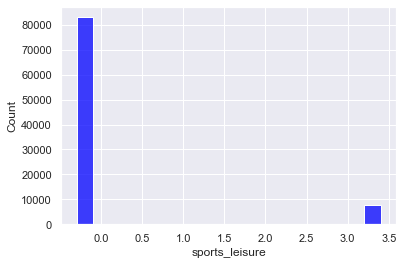

In [103]:
plt.subplots(figsize=(7, 8))
for i in df_standardized_without_outliers.columns:
    sns.histplot(data = df_standardized_without_outliers, x=i, color="blue")
    plt.show()

In [104]:
df_standardized_without_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90644 entries, 0 to 96515
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_total_number_of_items    90644 non-null  float64
 1   payment_type                   90644 non-null  float64
 2   payment_value                  90644 non-null  float64
 3   review_score                   90644 non-null  float64
 4   customer_zip_code_prefix       90644 non-null  float64
 5   customer_city                  90644 non-null  float64
 6   customer_state                 90644 non-null  float64
 7   order_purchase_timestamp       90644 non-null  float64
 8   product_category_name_english  90644 non-null  float64
 9   appliances                     90644 non-null  float64
 10  arts                           90644 non-null  float64
 11  auto                           90644 non-null  float64
 12  construction                   90644 non-null 

### Elbow method: determining the best K number of clusters

A pipeline is created to include the preprocessing and visualization of the elbow method of our K-Means.

In [157]:
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline, make_pipeline
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance

ImportError: cannot import name 'safe_indexing' from 'sklearn.utils' (C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\__init__.py)

In [ ]:
X = df_standardized_without_outliers.copy()

# Elbow method
kmeans_visualizer = Pipeline([("kelbowvisualizer", KElbowVisualizer(KMeans(),K=(4,12)))])
kmeans_visualizer.fit(X)
kmeans_visualizer.named_steps['kelbowvisualizer'].show()